# Recap on optimization and the consumer problem

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

## Optimization

Suppose we want to find the minimum of the following function:
 $$
 f(x) = \sin(x) + 0.05*x^2
 $$

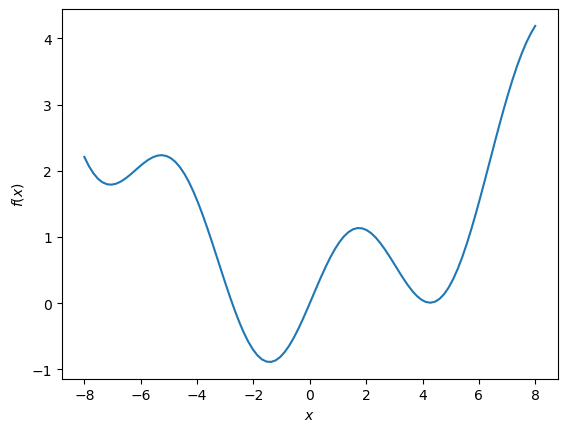

In [2]:
# Define function
def f(x):
    return np.sin(x) + 0.05*x**2

# Plot:
def plot_figure():
    x_grid_plot = np.linspace(-8, 8, 100)
    f_grid_plot = f(x_grid_plot)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x_grid_plot,f_grid_plot)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$f(x)$')
    return fig, ax;
fig, ax= plot_figure()

### Grid search

Minimizing x:-1.37
Minimum: -0.89


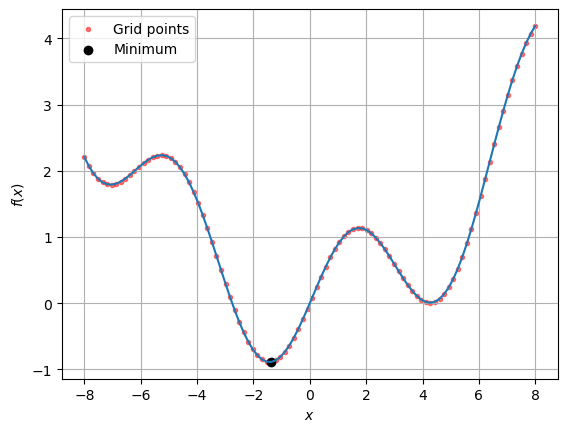

In [3]:
# Create grid of x
N_points = 100
x_grid = np.linspace(-8, 8, N_points)

# Loop through x and f to find x that minimizes f
x_best = np.nan
f_best = np.inf

for x in x_grid:
    if f(x) <= f_best:
        f_best = f(x)
        x_best = x

print(f'Minimizing x:{x_best:5.2f}')
print(f'Minimum: {f_best:5.2f}')

# Add to the plot
fig, ax = plot_figure()

ax.scatter(x_grid, f(x_grid), color='red', marker='.', alpha=0.5, label='Grid points')
ax.scatter(x_best, f_best, color='black',label='Minimum')

ax.grid()
ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$');

### Solver - an illustrative Newton optimizer

This very simple optimizer is a Newton optimizer, meaning that is updates guesses based on the gradient and hessianof the function in the point of evaluation. This one is purely illustrative and not particularly robust - use one of SciPy's optimizers for solving problem sets and projects.


Converged!
Minimizing x: -1.43
Minimum: -0.89


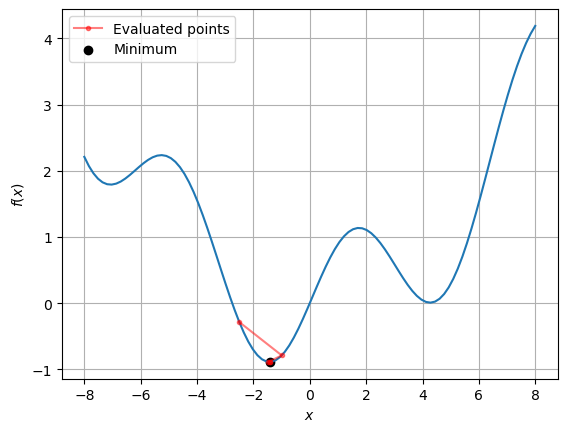

In [4]:
# gradient of f
def f_grad(x):
    return np.cos(x) + 0.1*x

# hessian of f
def f_hess(x):
    return -np.sin(x) + 0.1

# this function computes the next step given a function and x
def newton_step(f, grad, hess, x0):
    x_next = x0 - grad(x0)/hess(x0)
    return x_next

# setup
x0 = -2.5 # -2.5 for global minimum # 5 for local min # -3 for maximum
x_list = np.array([])
delta = np.inf      
tol = 1e-6          # Tolerance: when the distance between consecutive guesses of x get smaller than this value, we assume we have converged to a minimum
maxiter = 1000      # Max iterations: if the solver has taken more steps than this, we quit and deem the optimizatoin unsuccessful
i = 0

# Take steps until convergence
while delta>tol and i<maxiter:
    x1 = newton_step(f, f_grad, f_hess, x0) # compute next step
    delta = np.abs(x1-x0) # check convergence
    x_list = np.append(x_list,x0) # append to list
    x0 = x1 # update x

    i += 1

if i < maxiter:
    print('Converged!')
    print(f'Minimizing x: {x0:5.2f}')
    print(f'Minimum: {f(x0):5.2}')
else:
    print('Did not converge')


# Plot
fig, ax = plot_figure()

ax.plot(x_list, f(x_list), color='red', marker='.', alpha=0.5, label='Evaluated points')
ax.scatter(x0, f(x0), color='black',label='Minimum')

ax.grid()
ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$');

This can (and probably should) be done using a SciPy solver:

In [5]:
# You can use minimize_scalar when optimizing over just one dimension
res_scalar = optimize.minimize_scalar(fun=f)
res_scalar

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.8878628265737075
       x: -1.4275517796760682
     nit: 9
    nfev: 13

In [6]:
# Otherwise, use minimize. here you have to provide at least a starting value x0
res = optimize.minimize(fun=f, x0=-3, method='bfgs')
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.8878628265737039
        x: [-1.428e+00]
      nit: 5
      jac: [ 8.941e-08]
 hess_inv: [[ 9.180e-01]]
     nfev: 12
     njev: 6

The solver output means the following:
* message: Status report that tells you if optimization was succesful or not.
* success: Boolean indicator for whether the solver converged to a minimum.
* status: Termination status by solver. See message for details.
* fun: function value at the found minimium.
* x: the minimum*
* nit: number of steps taken by the solver.
* nfev: number of times the objective function f was evaluated by the solver.

Other input that may show up:
* jac: first derivative/gradient/jacobian. Should be close to zero for the first order condition to hold.
* hess: second derivative/hessian. Shoud be positive (definite) for the second order condition to hold.
* hess_inv: 1/hessian. Shoud be positive (definite) for the second order condition to hold.
* njev: number of times the jacobian was evaluated by the solver.
* nhev: number of times the hessian was evaluated by the solver.
* final_simplex: (specific to Nelder-Mead) simplex containing minimum.

The BFGS solver works by computing the gradient of the function in the point of evaluation to determine where to go next to look for the minimum. By default, it computes the gradient numerically.
Above, we defined the gradient of f as f_grad. We can make the solver even faster by providing it with the gradient - note that the number function evaluations is now down to 6 rather than 12.

In [7]:
res = optimize.minimize(fun=f, x0=-3, jac=f_grad, method='bfgs')
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.8878628265737033
        x: [-1.428e+00]
      nit: 5
      jac: [ 9.599e-08]
 hess_inv: [[ 9.180e-01]]
     nfev: 6
     njev: 6

Some solvers can also be provided with the gradient, eg. the newton-cg (a more robust version of the algorithm I implemented above)
now the number of steps taken before converging is down to 4!

In [8]:
res = optimize.minimize(fun=f, x0=-3, jac=f_grad, hess=f_hess, method='newton-cg')
res

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -0.8878628265737075
       x: [-1.428e+00]
     nit: 4
     jac: [-3.848e-07]
    nfev: 6
    njev: 6
    nhev: 4

Takeaway: If you can provide the solver with a gradient (and hessian), you may get a speedup. Otherwise, the solver will compute them numerically, which requires more funciton evaluations.

Some solvers don't use the gradient at all, eg. the Nelder-Mead algorithm. This solver generally requires a lot more function evaluations and is therefore slower. But on the plus side, it is more robust to cases where the gradient may be ill-behaved.

In [9]:
res = optimize.minimize(fun=f, x0=-3, method='nelder-mead')
res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -0.887862826499147
             x: [-1.428e+00]
           nit: 17
          nfev: 34
 final_simplex: (array([[-1.428e+00],
                       [-1.427e+00]]), array([-8.879e-01, -8.879e-01]))

## Optimization in higher dimensions

The methods are also applicable in higher dimensions. Try with this function:
$$
g(x,y) = (1-x)^2 + 100*(y-x^2)^2
$$

In [10]:
def g(x,y):
    return (1-x)**2 + 100*(y-x**2)**2

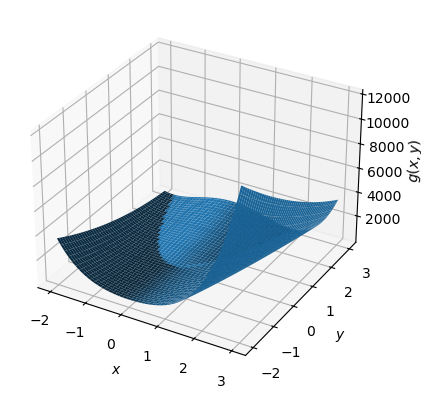

In [11]:
x_grid_plot = np.linspace(-2, 3, 100)
y_grid_plot = np.linspace(-2, 3, 100)
x_mesh, y_mesh = np.meshgrid(x_grid_plot, y_grid_plot)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(x_mesh, y_mesh, g(x_mesh, y_mesh))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$g(x,y)$');

### Grid search

In [12]:
N_points = 25

x_grid = np.linspace(-2,3,N_points)
y_grid = np.linspace(-2,3,N_points)

g_best = np.inf
x_best = np.nan
y_best = np.nan

for x in x_grid:
    for y in y_grid:
        if g(x,y) < g_best:
            g_best = g(x,y)
            x_best = x
            y_best = y

print(f'Minimizing (x,y): ({x_best:3.2f}, {y_best:3.2f})')
print(f'Minimum: {g(x_best, y_best):3.2f}')

Minimizing (x,y): (0.71, 0.50)
Minimum: 0.09


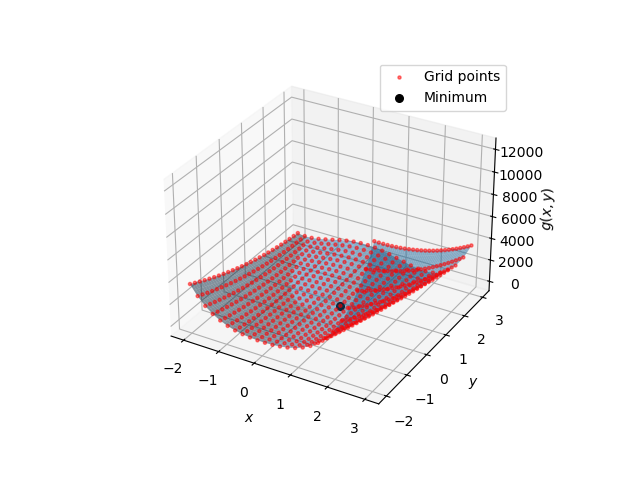

In [13]:
%matplotlib widget
x_gs_mesh, y_gs_mesh = np.meshgrid(x_grid, y_grid)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(x_mesh, y_mesh, g(x_mesh, y_mesh),alpha = 0.5)

ax.scatter(x_gs_mesh, y_gs_mesh, g(x_gs_mesh,y_gs_mesh), marker='.', color='red', alpha=0.5, label='Grid points')
ax.scatter(x_best, y_best, g(x_best,y_best), marker='o', s=30, color='black', label='Minimum')

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$g(x,y)$');

### Solver

In [14]:
# define objective function:
obj = lambda x: g(x[0], x[1])

res = optimize.minimize(fun=obj, x0=(x_best, y_best), method='bfgs') # guess on minimum in grid search
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.077767585294057e-11
        x: [ 1.000e+00  1.000e+00]
      nit: 13
      jac: [ 1.960e-06 -1.059e-06]
 hess_inv: [[ 4.855e-01  9.700e-01]
            [ 9.700e-01  1.943e+00]]
     nfev: 54
     njev: 18

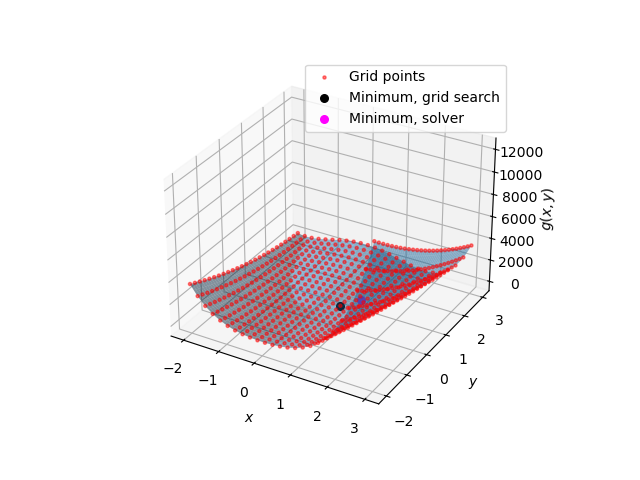

In [15]:
%matplotlib widget
x_gs_mesh, y_gs_mesh = np.meshgrid(x_grid, y_grid)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(x_mesh, y_mesh, g(x_mesh, y_mesh),alpha = 0.5)

ax.scatter(x_gs_mesh, y_gs_mesh, g(x_gs_mesh,y_gs_mesh), marker='.', color='red', alpha=0.5, label='Grid points')
ax.scatter(x_best, y_best, g(x_best,y_best), marker='o', s=30, color='black', label='Minimum, grid search')

ax.scatter(res.x[0], res.x[1], res.fun, marker='o', s=30, color='magenta', label='Minimum, solver')

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$g(x,y)$');

## Solving a consumer problem

Consider a simple consumer problem:

$$
\max_{c, \ell} \frac{c^{1-\sigma}}{1-\sigma} - \frac{\ell^{1+\nu}}{1+\nu} \\
\text st. \quad c \leq w\ell
$$

In words: choose consumption $c$ and labor supply $\ell$ subject to budget constraint.
There are several ways to solve this problem.

In [16]:
# set parameters
from types import SimpleNamespace
par = SimpleNamespace()
par.sigma = 2
par.nu = 0.4
par.w = 1.5

1: As a constrained optimization problem in two dimensions

In [17]:
# define utility function
def utility(c, l, par):
    return (c**(1-par.sigma))/(1-par.sigma) - (l**(1+par.nu)/(1+par.nu))

# define budget constraint function
def budgetcons(c, l, par):
    return par.w*l-c # this is negative when violated

# define objective function, constraint and initial guess
obj = lambda x: -utility(x[0], x[1], par)
const = ({'type':'ineq','fun':lambda x: budgetcons(x[0],x[1],par)})
x0 = np.array([1,1])

# optimize!
res = optimize.minimize(fun=obj,x0=x0,constraints=const,method='SLSQP') ## SLSQP is a solver for constrained optimization
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.3532041587961001
       x: [ 1.267e+00  8.448e-01]
     nit: 5
     jac: [-6.228e-01  9.347e-01]
    nfev: 15
    njev: 5

2: As an unconstrained optimization problem, using the budget constraint

In [18]:
# if the budget constraint binds, we know l from c
def utility_unc(c, par):
    l = c/par.w
    return (c**(1-par.sigma))/(1-par.sigma) - (l**(1+par.nu)/(1+par.nu))


# define objective function
obj = lambda c: -utility_unc(c, par)

#  optimize!
res = optimize.minimize(obj, x0=1, method='bfgs')
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.353204099862143
        x: [ 1.267e+00]
      nit: 5
      jac: [ 3.353e-06]
 hess_inv: [[ 8.407e-01]]
     nfev: 12
     njev: 6

3: As an unconstrained optimization problem using a penalty

In [22]:
def objective(c,l, par):
    utility = (c**(1-par.sigma))/(1-par.sigma) - (l**(1+par.nu)/(1+par.nu))

    # add penalty if budget constraint is violated
    penalty = 0
    if c > par.w*l:
        penalty += 1000*(c-par.w*l)

    return - (utility-penalty)

# define objective function
obj = lambda x: objective(x[0], x[1], par)
x0 = np.array([1,1])

# Optimize!
res = optimize.minimize(fun=obj, x0=x0, method='nelder-mead') ## The bfgs method didn't converge here, so I switched to Nelder-Mead
res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.35320410201299
             x: [ 1.267e+00  8.445e-01]
           nit: 70
          nfev: 133
 final_simplex: (array([[ 1.267e+00,  8.445e-01],
                       [ 1.267e+00,  8.446e-01],
                       [ 1.267e+00,  8.445e-01]]), array([ 1.353e+00,  1.353e+00,  1.353e+00]))